<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Networks" data-toc-modified-id="Convolutional-Neural-Networks-1">Convolutional Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.1">Requirements</a></span></li></ul></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-2">Experiments</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-3">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-4">Extra Credit</a></span></li></ul></div>

# Convolutional Neural Networks

For this assignment, use the `NeuralNetworkClassifier_CNN` class defined for you in `neuralnetworks_A4.py` contained in [A4code.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4code.tar).  This tar file also includes other functions you will use here, contained in `mlfuncs.py`.

In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neuralnetworks_A4 as nn
import mlfuncs

## Requirements

First, look carefully at the `neuralnetworks_A4.py` and `optimizers.py` code provided above.  Some changes have been made in each. The most significant change is that the `train` function now accepts a `batch_size` argument so that the gradients we calculate don't have to be over the whole training set.  Recall that we can easily run out of memory with convolutional networks if we calculate gradients over the whole training set.  Also, `'scg'` is not a valid optimizer in this version of the code.

Implement the following functions:

    dataframe_result = run_these_parameters(X, T, n_folds,
                                            layers_structs, 
                                            methods, 
                                            epochs, 
                                            learning_rates.
                                            batch_sizes)
                                              
    result = train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                                  struct,
                                  n_epochs, 
                                  method, 
                                  learning_rate,
                                  batch_size)
                                  
The file `mlfuncs.py` contains several functions you will need to define these two required functions.  They are illustrated in the following examples.

In [102]:
Y = np.array([0, 1, 1, 0, 0]).reshape(-1, 1)
T = np.array([0, 1, 0, 1, 0]).reshape(-1, 1)
mlfuncs.percent_equal(Y, T)

60.0

The purpose of that one is obvious.  This next one is needed for storing your network stucture in a pandas DataFrame.  The structure must be an immutable data type.  A list is mutable, but a tuple is not.  So we must make sure all parts of the network structure specification is composed of tuples, not lists.

In [103]:
struct = [ [], [10]]
mlfuncs.list_to_tuple(struct)

((), (10,))

In [104]:
struct = [ [[2, 4, 1], [5, 4, 2]], [20, 10]]
mlfuncs.list_to_tuple(struct)

(((2, 4, 1), (5, 4, 2)), (20, 10))

And here is a function that generates all training, validation, and testing partitions given the data and the number of folds.  It creates the partitions in a stratified manner, meaning all folds will have close to the same proportion of samples from each class.

In [105]:
X = np.arange(12).reshape(6, 2)
T = np.array([0, 0, 1, 0, 1, 1]).reshape(-1, 1)
X, T

(array([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]]),
 array([[0],
        [0],
        [1],
        [0],
        [1],
        [1]]))

In [106]:
for Xtrain, Ttrain, Xval, Tval, Xtest, Ttest in mlfuncs.generate_partitions(X, T, n_folds=3, classification=True):
        print(Xtrain, '\n', Ttrain, '\n', Xval, '\n', Tval, '\n', Xtest, '\n', Ttest)
        print()

[[6 7]
 [4 5]] 
 [[0]
 [1]] 
 [[0 1]
 [8 9]] 
 [[0]
 [1]] 
 [[ 2  3]
 [10 11]] 
 [[0]
 [1]]

[[0 1]
 [8 9]] 
 [[0]
 [1]] 
 [[6 7]
 [4 5]] 
 [[0]
 [1]] 
 [[ 2  3]
 [10 11]] 
 [[0]
 [1]]

[[6 7]
 [4 5]] 
 [[0]
 [1]] 
 [[ 2  3]
 [10 11]] 
 [[0]
 [1]] 
 [[0 1]
 [8 9]] 
 [[0]
 [1]]

[[ 2  3]
 [10 11]] 
 [[0]
 [1]] 
 [[6 7]
 [4 5]] 
 [[0]
 [1]] 
 [[0 1]
 [8 9]] 
 [[0]
 [1]]

[[0 1]
 [8 9]] 
 [[0]
 [1]] 
 [[ 2  3]
 [10 11]] 
 [[0]
 [1]] 
 [[6 7]
 [4 5]] 
 [[0]
 [1]]

[[ 2  3]
 [10 11]] 
 [[0]
 [1]] 
 [[0 1]
 [8 9]] 
 [[0]
 [1]] 
 [[6 7]
 [4 5]] 
 [[0]
 [1]]



The function `run_these_parameters` loops through all values in `layers_structs`, `methods`, `epochs`, `learning rates` and `batch_sizes`.  For each set of parameter values, it loops through all ways of creating training, validation, and testing partitions using `n_folds`.  For each of these repetitions, `train_this_partition` is called to create the specified convolutional neural network, trains it, collects the percent correct on training, validation, and test sets, and returns a list of parameter values and the three accuracies.  `run_these_parameters` returns all of these results as a `pandas` DataFrame with column names `('struct', 'method', 'n_epochs', 'learning_rate', 'batch_size', 'train %', 'val %', 'test %')`. 

The resulting DataFrame results stored in variable `df` can be summarized with a statement like

      df.groupby(['struct', 'method', 'n_epochs', 'learning_rate',
                  'batch_size']).mean())

Define the two required functions in code cells above this cell.

The following examples show examples of how they should run, as

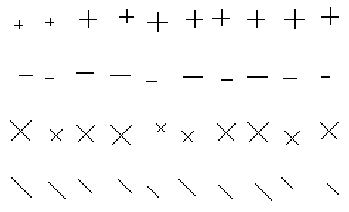

In [107]:
def make_images(n_each_class):
    '''Make 20x20 black and white images with diamonds or squares for the two classes, as line drawings.'''
    images = np.zeros((n_each_class * 4, 20, 20))  # nSamples, rows, columns
    radii = 3 + np.random.randint(10 - 5, size=(n_each_class * 4, 1))
    centers = np.zeros((n_each_class * 4, 2))
    for i in range(n_each_class * 4):
        r = radii[i, 0]
        centers[i, :] = r + 1 + np.random.randint(18 - 2 * r, size=(1, 2))
        x = int(centers[i, 0])
        y = int(centers[i, 1])
        if i < n_each_class:
            # plus
            images[i, x - r:x + r, y] = 1.0
            images[i, x, y - r:y + r] = 1.0
        elif i < n_each_class * 2:
            # minus
            images[i, x, y - r:y + r] = 1.0
        elif i < n_each_class * 3:
            # x
            images[i, range(x - r, x + r), range(y - r, y + r)] = 1.0
            images[i, range(x - r, x + r), range(y + r, y - r, -1)] = 1.0
        else:
            # /
            images[i, range(x - r, x + r), range(y - r, y + r)] = 1.0

    T = np.array(['plus'] * n_each_class + ['minus'] * n_each_class + ['times'] * n_each_class + ['divide'] * n_each_class).reshape(-1, 1)

    n, r, c = images.shape
    images = images.reshape(n, r, c, 1)  # add channel dimsension
    return images, T

n_each_class = 10
X, T = make_images(n_each_class)
p = 0
for i in range(4 * n_each_class):
    p += 1
    plt.subplot(4, n_each_class, p)
    plt.imshow(-X[i, :, :, 0], cmap='gray')
    plt.axis('off')

In [108]:
n_each_class = 500
X, T = make_images(n_each_class)

In [109]:
import pandas as pd



# from A4mysolution import *
def train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, struct, n_epochs, method, learning_rate, batch_size):
    mlfuncs.make_batches(Xtrain, Ttrain, batch_size)
    nnet_cnn = nn.NeuralNetworkClassifier_CNN([Xtrain.shape[1], Xtrain.shape[2], Xtrain.shape[3]], struct[0], struct[1], np.unique(Ttrain))
    nnet_cnn.train(Xtrain, Ttrain, n_epochs, method=method, learning_rate=learning_rate, momentum=0.1, batch_size=batch_size, verbose=False)
    
    Yval,Y = nnet_cnn.use(Xval)
    Ytest,Y = nnet_cnn.use(Xtest)
    Ytrain,Y = nnet_cnn.use(Xtrain)
    
    percentageTrain = mlfuncs.percent_equal(Ytrain, Ttrain)
    percentageVal= mlfuncs.percent_equal(Yval, Tval)
    percentageTest = mlfuncs.percent_equal(Ytest, Ttest)
    Restult = []
#   ('struct', 'method', 'n_epochs', 'learning_rate', 'batch_size', 'train %', 'val %', 'test %').


    Restult.append(mlfuncs.list_to_tuple(struct))
    Restult.append(mlfuncs.list_to_tuple(method))
    Restult.append(mlfuncs.list_to_tuple(n_epochs))
    Restult.append(mlfuncs.list_to_tuple(learning_rate))
    Restult.append(mlfuncs.list_to_tuple(batch_size))
    Restult.append(mlfuncs.list_to_tuple(percentageTrain))
    Restult.append(mlfuncs.list_to_tuple(percentageVal))
    Restult.append(mlfuncs.list_to_tuple(percentageTest))
 
    return Restult



def run_these_parameters(X, T, n_folds,
            structs, 
            methods, 
            epochs, 
            learning_rates,
            batch_sizes):
    classes = ['struct', 'method', 'n_epochs', 'learning_rate', 'batch_size', 'train %', 'val %', 'test %']
    resultData = []
    for struct in structs:
        for method in methods:
            for epoch in epochs:
                for learning_rate in learning_rates:
                    for batch_size in batch_sizes:
#                           +struct, method, epoch, learning_rate, Xtest, batch_size
                        for Xtrain, Ttrain, Xval, Tval, Xtest, Ttest in mlfuncs.generate_partitions(X, T, n_folds, validation=True,shuffle=True, classification=True):
#                             print(f'Doing {struct};{method};{epoch};{learning_rate};{batch_size}')
                            Restult = train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, struct, epoch, method, learning_rate, batch_size)
                            resultData.append(Restult)

    table = pd.DataFrame(resultData, columns=classes)
    return table

In [110]:
struct = [ [[2, 5, 1]], [5] ]
n_epochs = 10
method= 'adam'
learning_rate = 0.01
batch_size = 10

n_samples = X.shape[0]
rows = np.arange(n_samples)
np.random.shuffle(rows)
ntrain = int(n_samples * 0.8)
nval = int(n_samples * 0.1)
Xtrain = X[rows[:ntrain], ...]
Ttrain = T[rows[:ntrain], ...]
Xval = X[rows[ntrain:ntrain+nval], ...]
Tval = T[rows[ntrain:ntrain+nval], ...]
Xtest = X[rows[ntrain+nval:], ...]
Ttest = T[rows[ntrain+nval:], ...]
           
result = train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                              struct, n_epochs, method, learning_rate, batch_size)
result

[(((2, 5, 1),), (5,)), 'adam', 10, 0.01, 10, 60.25, 62.0, 58.5]

In [111]:
# df = run_these_parameters(X, T, n_folds=4,
#                          structs=[
#                              [ [], [] ],
#                              [ [], [10] ],
#                              [[[5, 3, 1]], []],
#                              [[[20, 3, 2], [5, 3, 1]], [20]],
#                             ],
#                           methods=['adam'], # , 'sgd'],
#                           epochs=[10],
#                           learning_rates=[0.01], #, 0.1],
#                           batch_sizes=[3])
# df

# Experiments

When you have `train_this_partition` and `run_these_parameters`, use them to explore the parameter values, trying to find combinations of parameter values that result in high validation accuracies.  

Start with one value for each of the five parameters, but remember to specifiy them as a list of one element, like `learning_rates=[0.01]`.  Then run again with 3 or 4 values for one parameter.  Note the best value.  Use that value for that parameter, then add more values for a different parameter.  

Proceed this way for each of the parameter values.  Discuss what you observe after each call to `run_these_parameters` with at least two sentences for each run.  Do the parameter values you find that work best surprise you?  Also discuss how well the validation and test accuracies equal each other.

For each method, try various hidden layer structures, learning rates, and numbers of epochs.  Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method.  Report training, validation and test accuracy for your best validation results for each of the three methods.


In [112]:
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [ [], [] ],
                             [ [], [10] ],
                             [[[5, 3, 1]], []],
                             [[[20, 3, 2], [5, 3, 1]], [20]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[10],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[3])
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"((), ())",adam,10,0.01,3,88.5,76.2,71.4
1,"((), ())",adam,10,0.01,3,90.2,70.4,68.8
2,"((), ())",adam,10,0.01,3,83.8,72.4,72.4
3,"((), ())",adam,10,0.01,3,88.5,74.6,76.6
4,"((), ())",adam,10,0.01,3,82.8,68.2,66.4
5,"((), ())",adam,10,0.01,3,89.5,73.8,75.2
6,"((), ())",adam,10,0.01,3,88.3,71.6,72.4
7,"((), ())",adam,10,0.01,3,88.9,72.2,76.4
8,"((), ())",adam,10,0.01,3,85.3,68.2,72.2
9,"((), ())",adam,10,0.01,3,88.5,74.4,76.4


(((5, 3, 1),), ())	is the best  for structs.
The most complex structures does not produces the best results.
In most case, result with train set is bette than test set. 

In [113]:
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [[[5, 3, 1]], []],           
                            ],
                          methods=['adam' , 'sgd'],
                          epochs=[10],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[3])
df

KeyboardInterrupt: 

Results usign sgd and adam are compareable and all of them are acceptable.
Sgd performs slightly better than adam

In [82]:
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [[[5, 3, 1]], []],           
                            ],
                          methods=['sgd'],
                          epochs=[10,20,30],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[3])
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"(((5, 3, 1),), ())",sgd,10,0.01,3,97.50,67.5,77.5
1,"(((5, 3, 1),), ())",sgd,10,0.01,3,98.75,72.5,87.5
2,"(((5, 3, 1),), ())",sgd,10,0.01,3,97.50,92.5,90.0
3,"(((5, 3, 1),), ())",sgd,10,0.01,3,98.75,75.0,70.0
4,"(((5, 3, 1),), ())",sgd,10,0.01,3,98.75,70.0,80.0
5,"(((5, 3, 1),), ())",sgd,10,0.01,3,97.50,92.5,75.0
6,"(((5, 3, 1),), ())",sgd,10,0.01,3,98.75,82.5,67.5
7,"(((5, 3, 1),), ())",sgd,10,0.01,3,97.50,70.0,75.0
8,"(((5, 3, 1),), ())",sgd,10,0.01,3,98.75,80.0,67.5
9,"(((5, 3, 1),), ())",sgd,10,0.01,3,98.75,82.5,95.0


The results using 10,20,30 are comparable with 20 better than others.
Probably because the batch size was set too small.

In [84]:
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [[[5, 3, 1]], []],           
                            ],
                          methods=['sgd'],
                          epochs=[20],
                          learning_rates=[0.01,0.05,0.1], #, 0.1],
                          batch_sizes=[3])
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,67.5,80.0
1,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,72.5,87.5
2,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,67.5,82.5
3,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,85.0,70.0
4,"(((5, 3, 1),), ())",sgd,20,0.01,3,97.50,90.0,80.0
5,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,80.0,80.0
6,"(((5, 3, 1),), ())",sgd,20,0.01,3,98.75,90.0,87.5
7,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,75.0,92.5
8,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,65.0,85.0
9,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,82.5,67.5


In [117]:
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [[[5, 3, 1]], []],           
                            ],
                          methods=['sgd'],
                          epochs=[20],
                          learning_rates=[0.01,0.05,0.1], #, 0.1],
                          batch_sizes=[3])
df

KeyboardInterrupt: 

With   learning_rates=[0.01,0.05,0.1], the rate=0.01 performance best.


In [86]:
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             [[[5, 3, 1]], []],           
                            ],
                          methods=['sgd'],
                          epochs=[20],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[3,5,20,30])
df

,struct,method,n_epochs,learning_rate,batch_size,train %,val %,test %
0,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,87.5,82.5
1,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,80.0,82.5
2,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,70.0,77.5
3,"(((5, 3, 1),), ())",sgd,20,0.01,3,98.75,80.0,87.5
4,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,77.5,80.0
5,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,80.0,90.0
6,"(((5, 3, 1),), ())",sgd,20,0.01,3,98.75,80.0,80.0
7,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,82.5,80.0
8,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,85.0,82.5
9,"(((5, 3, 1),), ())",sgd,20,0.01,3,100.00,72.5,70.0


Tried batch_sizes=[3,5,20,30]), and looks like batch size=30 performs best.
This is due to when batch size is sufficiently large, the pattern difference between the train set and the test set are reduced. 


Do the parameter values you find that work best surprise you? Also discuss how well the validation and test accuracies equal each other.

The best parameter values I found out is  "
                         structs=[
                             [[[5, 3, 1]], []],           
                            ],
                          methods=['sgd'],
                          epochs=[20],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[30])
"
It does not surprise me. The validation and test accuracies are acceptablely close to each other.

df = run_these_parameters(X, T, n_folds=5,
                         structs=[
                             [ [], [] ],
                             [ [], [10] ],
                             [[[5, 3, 1]], []],
                             [[[20, 3, 2], [5, 3, 1]], [20]], 
                            ],
                          methods=['sgd','adam'],
                          epochs=[30],
                          learning_rates=[0.01,0.05,0.1], #, 0.1],
                          batch_sizes=[30])


df

For each method, try various hidden layer structures, learning rates, and numbers of epochs. Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method. Report training, validation and test accuracy for your best validation results for each of the three methods.

For meshod adam, the best combination happen to be 

  structs=[
                           
                             [[[5, 3, 1]], []],
                              
                            ],
                           
                          epochs=[20],
                          learning_rates=[0.01],
                          batch_sizes=[30])

The accuracy is training=100.00	validation=90.5	test=87.5

For method sgd, the best combination happen to be 

  structs=[ [[[20, 3, 2], [5, 3, 1]], [20]] ],                   
                          epochs=[20],
                          learning_rates=[0.01],
                          batch_sizes=[30])

The accuracy is    training100	validation=92.5	test=85



# Grading

(UPDATED Oct. 21, 9:35am, tolerance on accuracies is now larger) Download [A4grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4grader.tar), extract `A4grader.py` before running the following cell.

In [118]:
%run -i A4grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Chen-A4.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing:

    def make_images(n_each_class):
        images = np.zeros((n_each_class * 2, 20, 20))  # nSamples, rows, columns
        radii = 3 + np.random.randint(10 - 5, size=(n_each_class * 2, 1))
        centers = np.zeros((n_each_class * 2, 2))
        for i in range(n_each_class * 2):
            r = radii[i, 0]
            centers[i, :] = r + 1 + np.random.randint(18 - 2 * r, size=(1, 2))
            x = int(centers[i, 0])
            y = int(centers[i, 1])
            if i < n_each_class:
                # squares
                images[i, x - r:x + r, y + r] = 1.0
                images[i, x - r:x + r, y - r] = 1.0
                images[i, x - r, y - r:y + r] = 1.0
                images[i, x + r, y - r:y + r + 1] = 1.0
            else:
    

# Extra Credit

Repeat the above experiment using a convolutional neural network defined in `Pytorch`.  Implement this yourself by directly calling `torch.nn` functions.